__Задание 1__

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline
np.set_printoptions(suppress=True)

Генерируем датасет:

In [2]:
bias = 20
X, y, coef = datasets.make_regression(n_samples = 5000, n_features = 1, n_informative = 1, bias = bias, n_targets = 1,
                                     noise = 30, coef = True, random_state = 42)

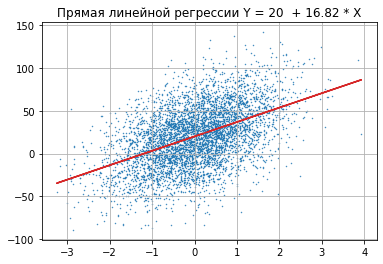

In [4]:
plt.scatter(X, y, s = 0.2)
plt.plot(X, bias + coef * X, color = 'C3')
plt.title(f'Прямая линейной регрессии Y = {bias}  + {coef:.2f} * X')
plt.grid()

Добавляем столбец к данным:

In [5]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

Напишем функцию стандартизации данных:

In [6]:
def calc_std_feat(x : np.array):
    return (x -x.mean()) / x.std()

In [7]:
for i in range (1, X.shape[1]):
    X[:, i] = calc_std_feat(X[:, i])

In [8]:
X.mean(axis = 0), X.std(axis = 0)

(array([1., 0.]), array([0., 1.]))

Напишем функцию вычисления среднеквадратичной ошибки:

In [9]:
def calc_mse(y, y_pred):
    return np.mean(np.square(y - y_pred))

In [ ]:
calc_mse(y, bias + coef * X[:, 1])

In [10]:
def gradient_descent(X, y, alpha, iters, tol):
    w = np.random.randn(X.shape[1])
    err_hist, w_hist = [], [w]
    
    for i in range (int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)
        
        w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / X.shape[0]
        w_hist.append(w)
        
        if i > 2 and np.linalg.norm(w - w_hist[-2], ord = 2) < tol:
            break
            
    return w, w_hist, err_hist       

In [11]:
def stochastic_gradient_descent(X, y, alpha, iters, tol, n):  
    w = np.random.randn(X.shape[1]) 
    err_hist, w_hist = [], [w]

    for i in range(int(iters)):
        y_pred = np.dot(X, w)
        
        err = calc_mse(y, y_pred)
        err_hist.append(err)

        b = np.random.randint(X.shape[0], size=n)

        w = w - 2 * alpha * np.dot(X[b].T, (np.dot(X[b], w) - y[b])) / X.shape[0]

        w_hist.append(w)

        if i > 2 and np.linalg.norm(w - w_hist[-2], ord=2) < tol:
            break
        
    return w, w_hist, err_hist

In [12]:
def plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim):
    fig = plt.figure (figsize=( 20, 10))
    
    plt.subplot(131)
    plt.title('$MSE$')
    plt.plot(err_hist, linewidth=2, color='C3')
    plt.plot(s_err_hist, linewidth=2, color='C2')
    plt.legend(('Градиентный спуск', 'Стохастический градиентный спуск'), loc='best')
    plt.xlim(xlim[0], xlim[1])
    plt.xlabel('$iterations$')
    plt.ylabel('$MSE$')
    plt.grid()

    plt.subplot(132)
    plt.title('Веса: градиентный спуск')
    plt.plot(w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()
    
    plt.subplot(133)
    plt.title('Веса: стохастический градиентный спуск')
    plt.plot(s_w_hist, linewidth=2)
    plt.legend([f'$w_{i}$' for i in range(len(w_hist[0]))], loc='best')
    plt.xlabel('$iterations$')
    plt.ylabel('$w$')
    plt.grid()

In [13]:
def execute(alpha, iters, tol, n, xlim):
    
    w, w_hist, err_hist = gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol)
    s_w, s_w_hist, s_err_hist = stochastic_gradient_descent(X, y, alpha=alpha, iters=iters, tol=tol, n=n)
    
    print(f'Градиентный спуск: количество итераций = {len(err_hist)}, MSE = {err_hist[-1]:.2f}, \
{[f"w{i} = {w_hist[-1][i]:.2f}" for i in range(len(w_hist[0]))]}')
    
    print(f'Стохастический градиентный спуск: количество итераций = {len(s_err_hist)}, MSE = {s_err_hist[-1]:.2f}, \
{[f"w{i} = {s_w_hist[-1][i]:.2f}" for i in range(len(s_w_hist[0]))]}')
    
    plot(w_hist, err_hist, s_w_hist, s_err_hist, xlim)


Градиентный спуск: количество итераций = 60, MSE = 934.98, ['w0 = 19.47', 'w1 = 16.67']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 934.98, ['w0 = 19.51', 'w1 = 16.69']
Wall time: 1.3 s


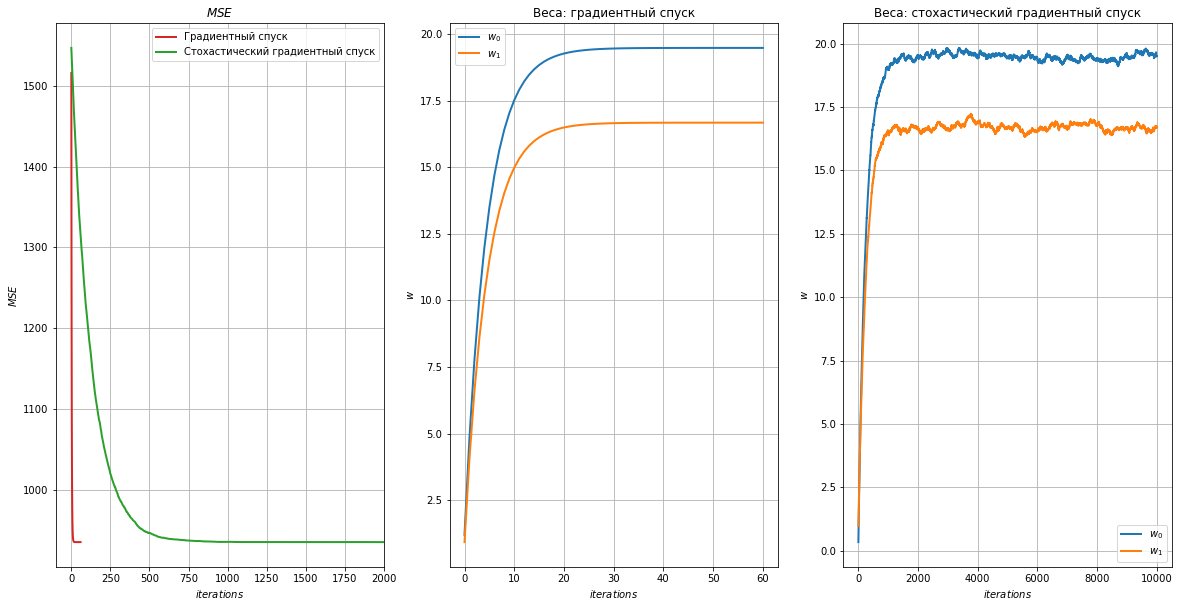

In [15]:
%%time

execute(alpha = 0.1, iters = 1e4, tol = 1e-5, n = 100, xlim= [-100, 2000])

Метод классического градиентного спуска на данной модели работает эффективнее. Необходимо около 60 итераций для достижения заданной точности, а к коэффициентам регрессии, близким к заданным, он приближается около 20 итерации. Алгоритм стохастического спуска же, проходит по всем итерациям до конца, нь близких значений коэффицентов регресии достигагает в в районе 2000 итерации. 

Алгоритм стохастического градиентного спуска сильно зависит от параметров скорости обучения и количетсва элементов в батче:

Градиентный спуск: количество итераций = 1008, MSE = 934.98, ['w0 = 19.47', 'w1 = 16.67']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 947.19, ['w0 = 16.76', 'w1 = 14.47']
Wall time: 1.57 s


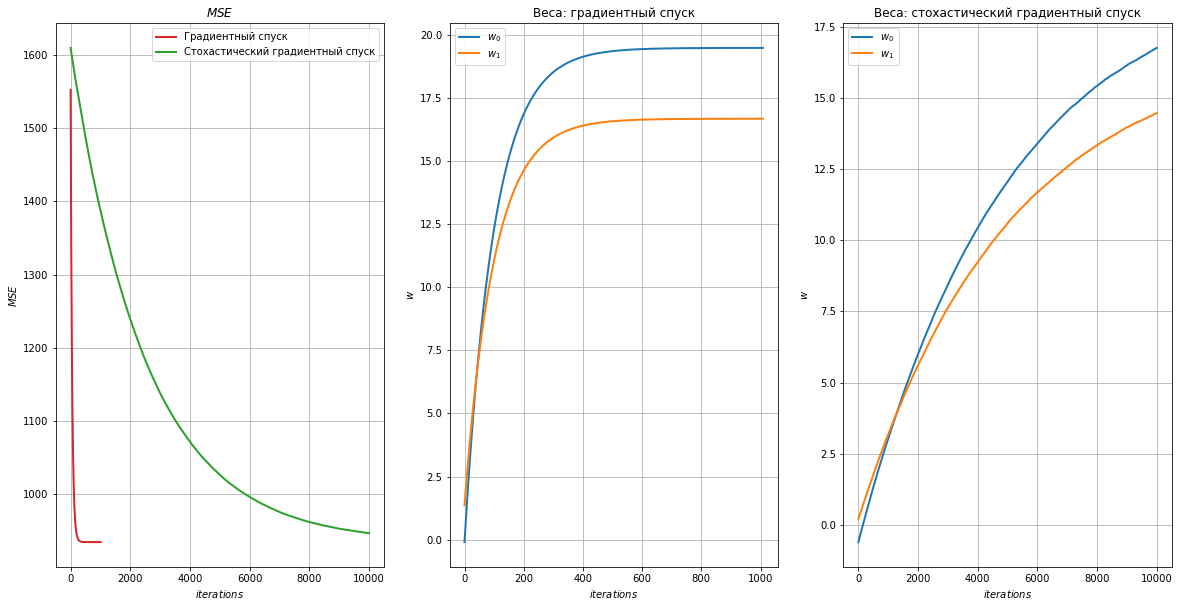

In [16]:
%%time

execute(alpha = 0.005, iters = 1e4, tol = 1e-5, n = 100, xlim = [None, None]) 

Градиентный спуск: количество итераций = 60, MSE = 934.98, ['w0 = 19.47', 'w1 = 16.67']
Стохастический градиентный спуск: количество итераций = 10000, MSE = 935.17, ['w0 = 19.41', 'w1 = 16.24']
Wall time: 1.24 s


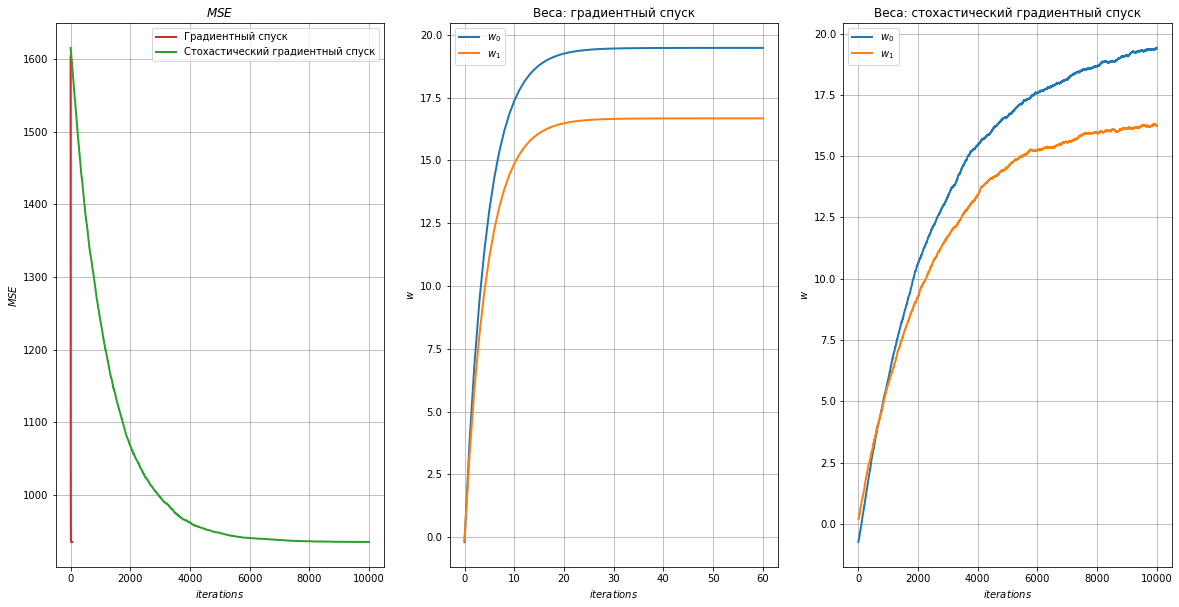

In [17]:
%%time

execute(alpha = 0.1, iters = 1e4, tol = 1e-5, n = 10, xlim = [None, None])